## Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
      
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Collection and Processing

In [5]:
#loading the csv data to a pandas DataFrame
heart_data = pd.read_csv(r"C:\Users\Hello\Downloads\heart_disease_data.csv")
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# checking the distribution of target variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart , 
0 --> healthy Heart

## Splitting the features and target

In [9]:
X = heart_data.drop(columns='target' , axis=1)
Y = heart_data['target']

In [10]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [11]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


## Splitting the Data into Training data & Test Data 

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X ,Y, test_size=0.2, stratify=Y, random_state=2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


## Model Training

### Logistic Regression 

In [14]:
model = LogisticRegression()

In [15]:
# training the logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

## Model Evaluation of Logistic Regression

#### Accuracy Score

In [16]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = round(accuracy_score(X_test_prediction,Y_test)*100,2)

In [17]:
print("Accuracy on Testing data of LR : "+ str(testing_data_accuracy) + " %")

Accuracy on Testing data of LR : 81.97 %


## SVM

In [18]:
sv_model = svm.SVC(kernel = 'linear')
sv_model.fit(X_train, Y_train)

SVC(kernel='linear')

## Model Evaluation for SVM

#### Accuracy Score

In [19]:
#accuracy on testing data
SV_X_test_prediction = model.predict(X_test)
SV_testing_data_accuracy = round(accuracy_score(SV_X_test_prediction,Y_test)*100,2)

In [20]:
print("Accuracy on Testing data of SVM : "+ str(SV_testing_data_accuracy) + " %")

Accuracy on Testing data of SVM : 81.97 %


## KNN

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

## Model Evaluation for KNN

#### Accuracy Score

In [22]:
#accuracy on testing data
KNN_X_test_prediction = knn_model.predict(X_test)
KNN_testing_data_accuracy = round(accuracy_score(KNN_X_test_prediction,Y_test)*100,2)

In [23]:
print("Accuracy on Testing data of KNN : "+ str(KNN_testing_data_accuracy) + " %")

Accuracy on Testing data of KNN : 60.66 %


## Decision Tree

In [24]:
max_accuracy = 0


for x in range(200):
    dt_model = DecisionTreeClassifier(random_state=x)
    dt_model.fit(X_train,Y_train)
    dt_X_test_prediction = dt_model.predict(X_test)
    current_accuracy = round(accuracy_score(dt_X_test_prediction,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt_model = DecisionTreeClassifier(random_state=best_x)
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

## Model Evaluation for DT

#### Accuracy Score

In [25]:
#accuracy on testing data
dt_X_test_prediction = dt_model.predict(X_test)
dt_testing_data_accuracy = round(accuracy_score(dt_X_test_prediction,Y_test)*100,2)

In [26]:
print("Accuracy on Testing data of DT : "+ str(dt_testing_data_accuracy) + " %")

Accuracy on Testing data of DT : 83.61 %


## OUTPUT FINAL SCORE

In [27]:
scores = [testing_data_accuracy,SV_testing_data_accuracy,KNN_testing_data_accuracy,dt_testing_data_accuracy]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 81.97 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 60.66 %
The accuracy score achieved using Decision Tree is: 83.61 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

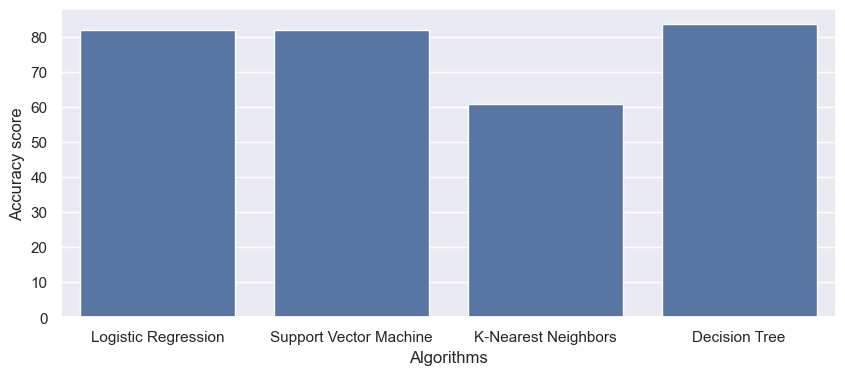

In [28]:
sns.set(rc={'figure.figsize':(10,4)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)